<a href="https://colab.research.google.com/github/2303a52163/EXPLAINABLE-AI-LAB/blob/main/ASSIN9IMENT_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# **1. Load dataset**

In [ ]:
df = pd.read_csv("/content/LinkedIn company information datasets (Public web data).csv")
df.head()


,timestamp,id,name,country_code,locations,formatted_locations,followers,employees_in_linkedin,about,specialties,...,similar,sphere,url,type,updates,slogan,affiliated,funding,stock_info,investors
0,2023-08-10,be-nijs-business-development,Be Nijs * Business- & Concept Development,NL,"Bilderdijkkade 60 Amsterdam, Noord-Holland 105...","Bilderdijkkade 60, Amsterdam, Noord-Holland 10...",168,NaN,"Voor Startups, ondernemers en bedrijven die he...","Expansie bedrijfsactiviteiten, Marketing strat...",...,"[{""Links"":""https://www.linkedin.com/company/ro...",Business Consulting and Services,https://www.linkedin.com/company/be-nijs-busin...,Self-Owned,"[{""likes_count"":7,""text"":""Vandaag een nieuw co...","Voor Startups, ondernemers en bedrijven die he...",NaN,NaN,NaN,NaN
1,2023-08-09,texas-deaf-chamber-of-commerce,Texas Deaf Chamber of Commerce,US,"2028 E Ben White Blvd Ste 240-1856 Austin, TX ...","2028 E Ben White Blvd, Ste 240-1856, Austin, T...",190,3.0,MISSION STATEMENT: “The mission of this Chambe...,"Business Development, Mentoring, Networking, A...",...,"[{""Links"":""https://www.linkedin.com/company/gl...",Civic and Social Organizations,https://www.linkedin.com/company/texas-deaf-ch...,Nonprofit,"[{""text"":""ATTENTION! Texas Deaf Chamber has up...",501c6 non-profit organization by Deaf business...,NaN,NaN,NaN,NaN
2,2023-08-09,cellpraxis,CellPraxis®,BR,"Avenida Paulista número 2001, 5º andar, cj. 52...","Avenida Paulista, número 2001, 5º andar, cj. 5...",2062,1.0,"Fundada em 2008, a Cellpraxis® é uma empresa d...","Saúde, Ciências da vida, Terapia celular, Medi...",...,"[{""Links"":""https://br.linkedin.com/company/cry...",Biotechnology Research,https://www.linkedin.com/company/cellpraxis,Privately Held,NaN,Empresa de bioengenharia que desenvolve produt...,NaN,NaN,NaN,NaN
3,2023-08-10,diamond-tools-plant,DIAMOND TOOLS PLANT,UA,"Стретенская 69 Полтава, Полтавская 36003, UA,Ш...","Стретенская 69, Полтава, Полтавская 36003, UA,...",7,2.0,Мы применяем самые передовые технологии для пр...,NaN,...,"[{""Links"":""https://de.linkedin.com/company/nex...",Industrial Machinery Manufacturing,https://www.linkedin.com/company/diamond-tools...,Partnership,"[{""text"":""Осторожно, подделка! С целью защиты ...",ПРОФЕССИОНАЛЬНЫЙ И СОВРЕМЕННЫЙ ПРОИЗВОДИТЕЛЬ А...,NaN,NaN,NaN,NaN
4,2023-08-10,woodsfilm,Thieves Kitchen,GB,"50 Jermyn Street London, England SW1Y 6LX, GB","50 Jermyn Street, London, England SW1Y 6LX, GB",68,2.0,Thieves Kitchen is a multi-award-winning produ...,"On Air Promos, Idents, Commercials, B2B Promos...",...,"[{""Links"":""https://uk.linkedin.com/company/bla...",Media Production,https://www.linkedin.com/company/woodsfilm,Privately Held,NaN,Moving image creative and production.,NaN,NaN,NaN,NaN


#**Missing values**

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
timestamp                   0
id                          0
name                        0
country_code                1
locations                   0
formatted_locations         0
followers                   0
employees_in_linkedin     153
about                       2
specialties               235
company_size                0
organization_type          70
industries                  0
website                    31
crunchbase_url            985
founded                     4
company_id                  0
employees                 152
headquarters                1
image                       0
logo                        0
similar                   119
sphere                      0
url                         0
type                        0
updates                   509
slogan                    222
affiliated                951
funding                   985
stock_info               1000
investors                 991
dtype: int64


# **Infinite values**

In [ ]:
print(df.isin([np.inf, -np.inf]).any())

timestamp                False
id                       False
name                     False
country_code             False
locations                False
formatted_locations      False
followers                False
employees_in_linkedin    False
about                    False
specialties              False
company_size             False
organization_type        False
industries               False
website                  False
crunchbase_url           False
founded                  False
company_id               False
employees                False
headquarters             False
image                    False
logo                     False
similar                  False
sphere                   False
url                      False
type                     False
updates                  False
slogan                   False
affiliated               False
funding                  False
stock_info               False
investors                False
dtype: bool


# **duplicate values**

In [ ]:
df = df.drop_duplicates()

In [ ]:
print("Number of duplicate rows:")
print(df.duplicated().sum())

print("Duplicate rows:")
print(df[df.duplicated()])

Number of duplicate rows:
0
Duplicate rows:
Empty DataFrame
Columns: [timestamp, id, name, country_code, locations, formatted_locations, followers, employees_in_linkedin, about, specialties, company_size, organization_type, industries, website, crunchbase_url, founded, company_id, employees, headquarters, image, logo, similar, sphere, url, type, updates, slogan, affiliated, funding, stock_info, investors]
Index: []

[0 rows x 31 columns]


# **NaN values**

NaN counts per column:
country_code                1
employees_in_linkedin     153
about                       2
specialties               235
organization_type          70
website                    31
crunchbase_url            985
founded                     4
employees                 152
headquarters                1
similar                   119
updates                   509
slogan                    222
affiliated                951
funding                   985
stock_info               1000
investors                 991
dtype: int64


/tmp/ipython-input-3520985653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='coolwarm')


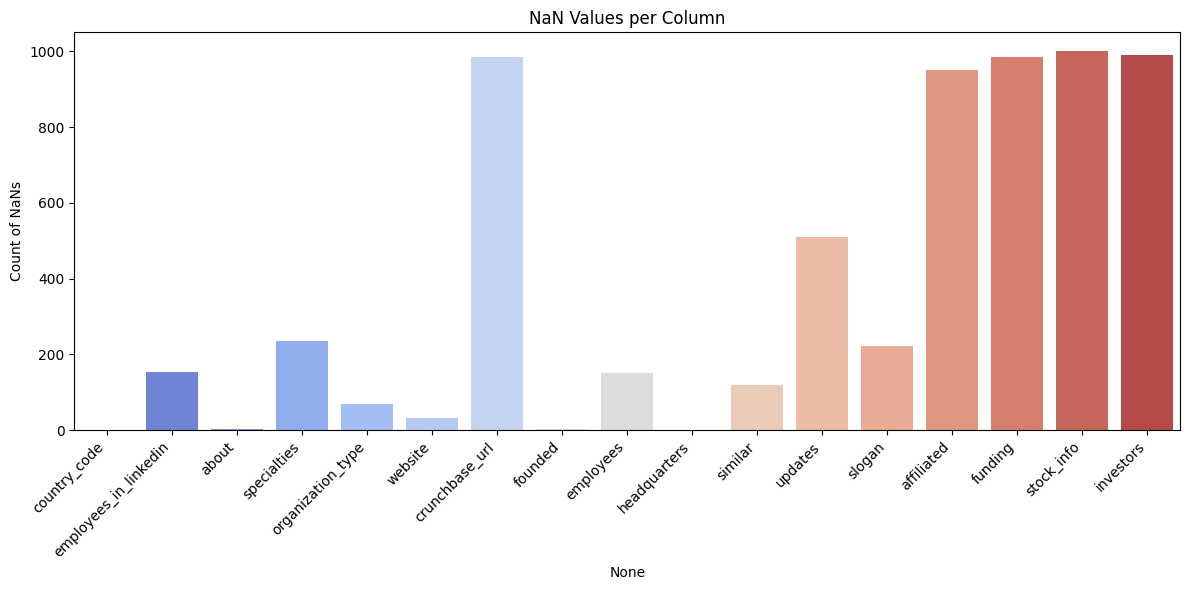

In [ ]:
# NaN counts
nan_counts = df.isnull().sum()
nan_counts = nan_counts[nan_counts > 0]

print("NaN counts per column:")
print(nan_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='coolwarm')
plt.title('NaN Values per Column')
plt.ylabel('Count of NaNs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Droping The Target & encoded target**

In [ ]:
target = df.columns[-1]
print(f"Target column set to: '{target}'")


X = df.drop(columns=[target])
y = df[target]

if y.dtype == object:
    y = LabelEncoder().fit_transform(y.astype(str))

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

Target column set to: 'investors'
Numeric cols: ['followers', 'employees_in_linkedin', 'founded', 'company_id', 'stock_info']
Categorical cols: ['timestamp', 'id', 'name', 'country_code', 'locations', 'formatted_locations', 'about', 'specialties', 'company_size', 'organization_type', 'industries', 'website', 'crunchbase_url', 'employees', 'headquarters', 'image', 'logo', 'similar', 'sphere', 'url', 'type', 'updates', 'slogan', 'affiliated', 'funding']


In [ ]:
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# **Spliting Data & Train Modal**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


df_cleaned = df.dropna(axis=1, how='all')

target_column_name = df.columns[-1]
if target_column_name not in df_cleaned.columns:
    print(f"Warning: Target column '{target_column_name}' was dropped as it contained all NaN values. Cannot proceed with model training.")
    pass

X = df_cleaned.drop(columns=[target_column_name])
y = df_cleaned[target_column_name]

numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

transformers = []
if len(numeric_cols) > 0:
    transformers.append(('num', numeric_transformer, numeric_cols))
if len(categorical_cols) > 0:
    transformers.append(('cat', categorical_transformer, categorical_cols))

if len(transformers) == 0:
    raise ValueError("No numeric or categorical columns found to preprocess!")

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

if y.dtype == 'object':
    y_imputed = y.fillna(y.mode()[0])
else:
    y_imputed = y.fillna(y.median())

print(f"Missing values in target after imputation: {y_imputed.isnull().sum()}")

le = LabelEncoder()
y_encoded = le.fit_transform(y_imputed.astype(str))
X_processed = preprocessor.fit_transform(X)

print(f"Processed feature shape: {X_processed.shape}")
can_stratify = all(pd.Series(y_encoded).value_counts() >= 2)

if can_stratify:
    print("Performing stratified train/test split on processed data.")
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
else:
    print("Stratified split not possible (some classes have less than 2 samples). Performing non-stratified split.")
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_encoded, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] if len(np.unique(y_train)) == 2 else None

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

if 'models' not in globals():
    models = {}
models['Random Forest'] = rf_model

Numeric columns: ['followers', 'employees_in_linkedin', 'founded', 'company_id']
Categorical columns: ['timestamp', 'id', 'name', 'country_code', 'locations', 'formatted_locations', 'about', 'specialties', 'company_size', 'organization_type', 'industries', 'website', 'crunchbase_url', 'employees', 'headquarters', 'image', 'logo', 'similar', 'sphere', 'url', 'type', 'updates', 'slogan', 'affiliated', 'funding']
Missing values in target after imputation: 0
Processed feature shape: (1000, 13663)
Stratified split not possible (some classes have less than 2 samples). Performing non-stratified split.
X_train shape: (800, 13663), X_test shape: (200, 13663)
y_train shape: (800,), y_test shape: (200,)


# **Numeric and categorical columns**

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())
for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])


In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
non_num_cols = X.select_dtypes(exclude=['int64', 'float64']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())
for col in non_num_cols:
    X[col] = X[col].fillna(X[col].mode()[0])


# **Machine Learning Models**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/content/LinkedIn company information datasets (Public web data).csv")

X = df.drop(columns=[df.columns[-1]])
y = df[df.columns[-1]]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

X_cleaned = X.dropna(axis=1, how='all')

numeric_cols_cleaned = X_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols_cleaned = X_cleaned.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_cleaned),
        ('cat', categorical_transformer, cat_cols_cleaned)
    ],
    remainder='drop'
)
X_processed = preprocessor.fit_transform(X_cleaned)

le = LabelEncoder()
y_encoded = le.fit_transform(y.astype(str))

can_stratify = all(pd.Series(y_encoded).value_counts() >= 2)

if can_stratify:
    print("Performing stratified train/test split.")
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
else:
    print("Stratified split not possible (some classes have less than 2 samples). Performing non-stratified split.")
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_encoded, test_size=0.2, random_state=42
    )

ml_models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}
results = []
for name, model in ml_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append([
        name,
        round(accuracy_score(y_test, y_pred), 3),
        round(precision_score(y_test, y_pred, average='macro', zero_division=0), 6),
        round(recall_score(y_test, y_pred, average='macro', zero_division=0), 6),
        round(f1_score(y_test, y_pred, average='macro', zero_division=0), 6)
    ])
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
results_df = results_df.sort_values(by='F1', ascending=False)

print("\n ML Models Performance (sorted by F1):\n")
print(results_df.to_string(index=False))

Stratified split not possible (some classes have less than 2 samples). Performing non-stratified split.
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...
Training Gradient Boosting...

 ML Models Performance (sorted by F1):

              Model  Accuracy  Precision   Recall       F1
Logistic Regression     0.990   0.330000 0.333333 0.331658
      Random Forest     0.990   0.330000 0.333333 0.331658
                KNN     0.990   0.330000 0.333333 0.331658
                SVM     0.990   0.330000 0.333333 0.331658
  Gradient Boosting     0.990   0.330000 0.333333 0.331658
      Decision Tree     0.985   0.247487 0.248737 0.248111


# **Deep Learning Models**

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from IPython.display import display as kernel_display

# --- Faster Early Stopping ---
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# --- Check data availability ---
required_vars_for_dl = ['X_train', 'y_train', 'X_test', 'y_test']
if not all(v in globals() and globals()[v] is not None for v in required_vars_for_dl):
    print("Error: Required variables not defined. Please run preprocessing first.")
else:
    X_tr_selected = globals().get('X_train_res', X_train)
    y_tr_selected = globals().get('y_train_res', y_train)

    # Convert to numpy arrays efficiently
    Xtr = np.asarray(X_tr_selected.toarray() if hasattr(X_tr_selected, 'toarray') else X_tr_selected)
    Xte = np.asarray(X_test.toarray() if hasattr(X_test, 'toarray') else X_test)
    ytr = np.asarray(y_tr_selected).astype(int)
    yte = np.asarray(y_test).astype(int)

    if len(np.unique(ytr)) <= 1:
        print("Error: Only one class in training data. Cannot proceed.")
    else:
        # --- Determine output configuration ---
        num_classes = len(np.unique(np.concatenate((ytr, yte))))
        if num_classes == 2:
            output_units, output_activation, loss_fn = 1, 'sigmoid', 'binary_crossentropy'
            print("Binary classification mode.")
        else:
            output_units, output_activation, loss_fn = num_classes, 'softmax', 'sparse_categorical_crossentropy'
            print(f"Multi-class classification ({num_classes} classes).")

        metrics_list = ['accuracy']
        dl_results_list = []

        def eval_dl(model, Xte, yte, name):
            if Xte.ndim == 2:
                X_eval = Xte
            elif Xte.ndim == 3:
                X_eval = Xte
            else:
                print(f"Skipping {name}: invalid input dimension {Xte.ndim}")
                return {"Model": name, "Accuracy": None, "Precision": None, "Recall": None, "F1": None}

            y_prob = model.predict(X_eval, verbose=0)
            if y_prob.shape[-1] == 1:
                y_pred = (y_prob.ravel() >= 0.5).astype(int)
                avg_type = None
            else:
                y_pred = np.argmax(y_prob, axis=1)
                avg_type = 'macro'

            res = {
                "Model": name,
                "Accuracy": accuracy_score(yte, y_pred),
                "Precision": precision_score(yte, y_pred, average=avg_type, zero_division=0),
                "Recall": recall_score(yte, y_pred, average=avg_type, zero_division=0),
                "F1": f1_score(yte, y_pred, average=avg_type, zero_division=0)
            }
            print(f"\n{name} Evaluation:\n", classification_report(yte, y_pred, zero_division=0))
            return res

        # --- Common training parameters ---
        EPOCHS = 10
        BATCH = 64

        # --- MLP ---
        try:
            mlp = Sequential([
                Input(shape=(Xtr.shape[1],)),
                Dense(64, activation='relu'),
                Dense(32, activation='relu'),
                Dense(output_units, activation=output_activation)
            ])
            mlp.compile(optimizer='adam', loss=loss_fn, metrics=metrics_list)
            print("\nTraining MLP...")
            mlp.fit(Xtr, ytr, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH, callbacks=[es], verbose=0)
            dl_results_list.append(eval_dl(mlp, Xte, yte, "MLP"))
        except Exception as e:
            print("MLP error:", e)

        # --- CNN1D ---
        try:
            Xtr_c = Xtr[..., np.newaxis]
            Xte_c = Xte[..., np.newaxis]
            cnn = Sequential([
                Input(shape=(Xtr_c.shape[1], 1)),
                Conv1D(32, 3, activation='relu'),
                MaxPooling1D(2),
                Flatten(),
                Dense(32, activation='relu'),
                Dense(output_units, activation=output_activation)
            ])
            cnn.compile(optimizer='adam', loss=loss_fn, metrics=metrics_list)
            print("\nTraining CNN1D...")
            cnn.fit(Xtr_c, ytr, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH, callbacks=[es], verbose=0)
            dl_results_list.append(eval_dl(cnn, Xte_c, yte, "CNN1D"))
        except Exception as e:
            print("CNN1D error:", e)

        # --- LSTM ---
        try:
            lstm = Sequential([
                Input(shape=(Xtr_c.shape[1], 1)),
                LSTM(64),
                Dense(32, activation='relu'),
                Dense(output_units, activation=output_activation)
            ])
            lstm.compile(optimizer='adam', loss=loss_fn, metrics=metrics_list)
            print("\nTraining LSTM...")
            lstm.fit(Xtr_c, ytr, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH, callbacks=[es], verbose=0)
            dl_results_list.append(eval_dl(lstm, Xte_c, yte, "LSTM"))
        except Exception as e:
            print("LSTM error:", e)

        # --- Display Results ---
        if dl_results_list:
            kernel_display(pd.DataFrame(dl_results_list))
        else:
            print("No models trained successfully.")


Multi-class classification (10 classes).

Training MLP...

MLP Evaluation:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.99      1.00      0.99       198

    accuracy                           0.99       200
   macro avg       0.33      0.33      0.33       200
weighted avg       0.98      0.99      0.99       200


Training CNN1D...

CNN1D Evaluation:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.99      1.00      0.99       198

    accuracy                           0.99       200
   macro avg       0.33      0.33      0.33       200
weighted avg       0.98      0.99      0.99       200


Training LSTM...

LSTM Evaluation:
               precision    recall  f1-score   support

           0       0.00      0.

,Model,Accuracy,Precision,Recall,F1
0,MLP,0.99,0.33,0.333333,0.331658
1,CNN1D,0.99,0.33,0.333333,0.331658
2,LSTM,0.99,0.33,0.333333,0.331658


# **Explainable AI (XAI)**

# **TOP 10 FEATURES**

/tmp/ipython-input-2639770160.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


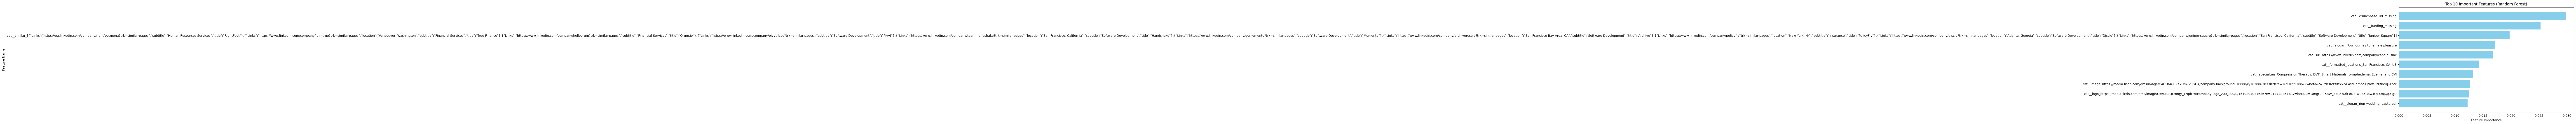

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rf_model = models.get('Random Forest', None)
if rf_model is None:
    raise ValueError("Random Forest model not found in 'models' dictionary.")

if 'preprocessor' in globals() and hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = list(preprocessor.get_feature_names_out())
else:
    feature_names = [f"feature_{i}" for i in range(rf_model.n_features_in_)]


importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# **Image for Top 10 Features**

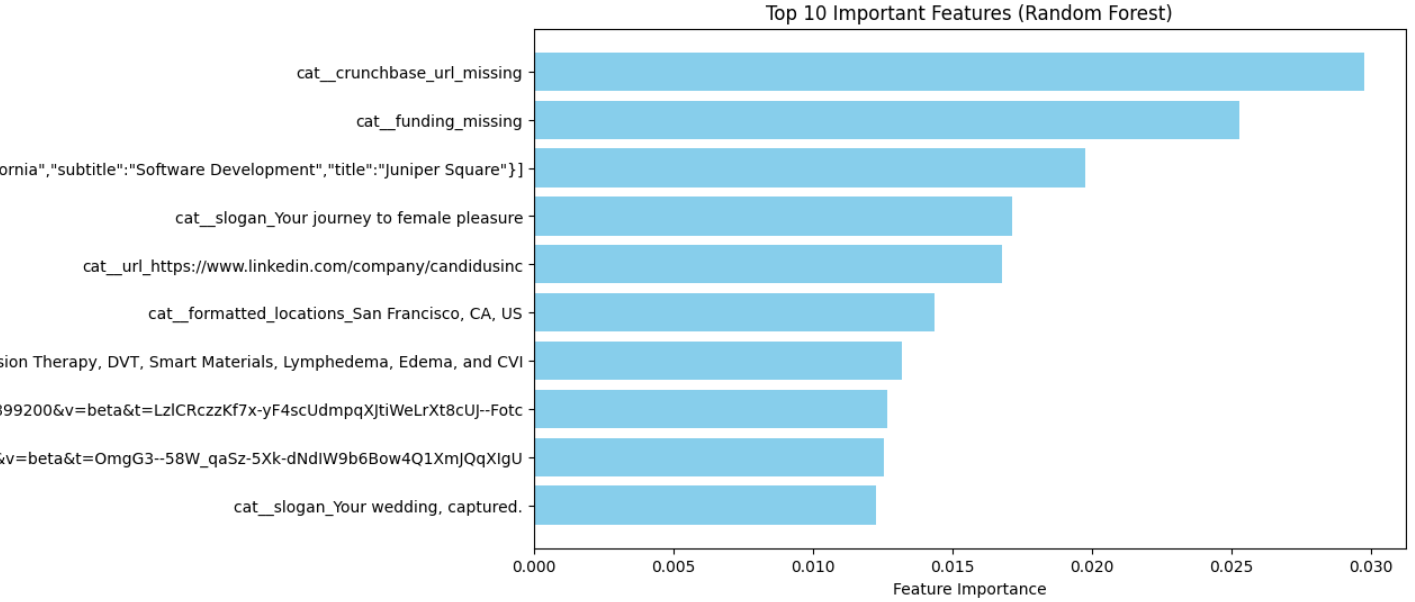

# **SHAP summary plot**

Random Forest model found. Proceeding with SHAP visualizations.
X_test data prepared as DataFrame with shape: (200, 13663)
Using 200 samples for SHAP calculation.

Generating SHAP Summary Plot...


<Figure size 640x480 with 0 Axes>

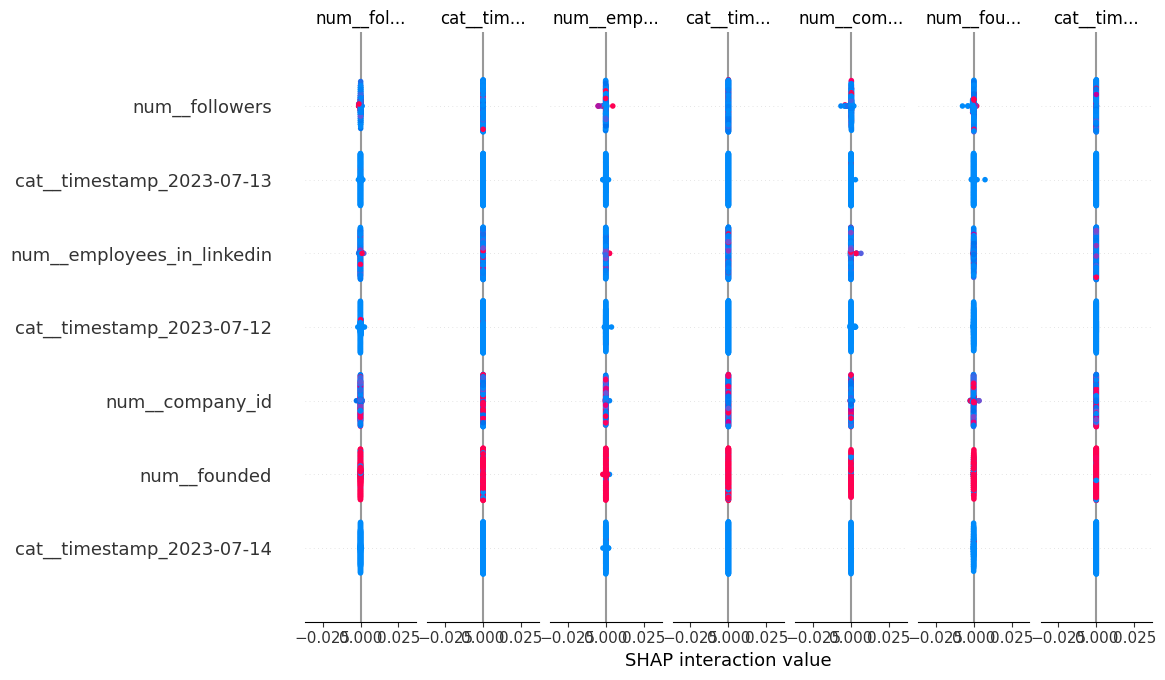

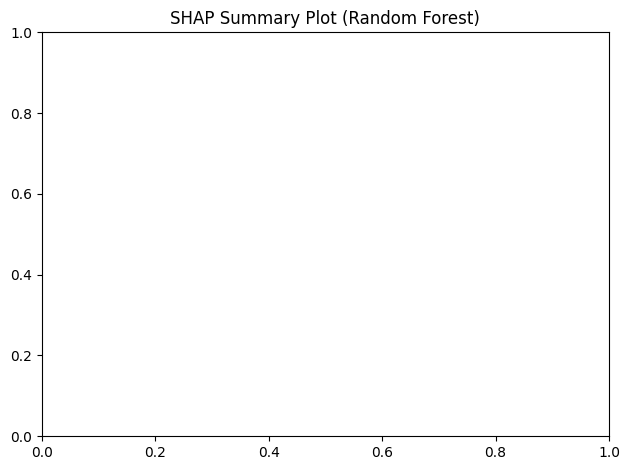

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

if 'models' in globals() and 'Random Forest' in models:
    rf = models['Random Forest']
    print("Random Forest model found. Proceeding with SHAP visualizations.")
else:
    print("Error: Random Forest model not found. Please train it first, e.g., rf_model = RandomForestClassifier(...).fit(X_train, y_train)")
    rf = None


X_test_df = None
if 'X_test' in globals():
    try:
        if hasattr(X_test, "toarray"):
            X_test_dense = X_test.toarray()
        elif isinstance(X_test, np.ndarray):
            X_test_dense = X_test
        elif isinstance(X_test, pd.DataFrame):
            X_test_df = X_test.copy()
            X_test_dense = X_test.values
        else:
            print("⚠ X_test is in an unexpected format. Attempting conversion.")
            X_test_dense = np.array(X_test)


        if X_test_df is None:
            if 'preprocessor' in globals() and hasattr(preprocessor, 'get_feature_names_out'):
                feature_names = list(preprocessor.get_feature_names_out())
                if len(feature_names) != X_test_dense.shape[1]:
                    print("⚠ Mismatch between preprocessor feature names and X_test columns. Using generic names.")
                    feature_names = [f"feature_{i}" for i in range(X_test_dense.shape[1])]
            else:
                print("⚠ Preprocessor not found or does not have get_feature_names_out. Using generic names.")
                feature_names = [f"feature_{i}" for i in range(X_test_dense.shape[1])]
            X_test_df = pd.DataFrame(X_test_dense, columns=feature_names)
        else:
            feature_names = X_test_df.columns.tolist()

        print(f"X_test data prepared as DataFrame with shape: {X_test_df.shape}")

    except Exception as e:
        print(f"Error preparing X_test data: {e}")
        X_test_df = None
else:
    print("Error: X_test variable not found. Cannot proceed with SHAP.")
    X_test_df = None

# --- Generate SHAP Summary Plot ---
if rf is not None and X_test_df is not None:
    try:
        n_samples = min(200, X_test_df.shape[0])
        X_shap = X_test_df.sample(n=n_samples, random_state=42)
        print(f"Using {n_samples} samples for SHAP calculation.")

        if isinstance(rf, (RandomForestClassifier, DecisionTreeClassifier, GradientBoostingClassifier, xgb.XGBClassifier)):
            explainer = shap.TreeExplainer(rf)
            shap_values = explainer.shap_values(X_shap)

            print("\nGenerating SHAP Summary Plot...")
            plt.figure()
            shap.summary_plot(shap_values, X_shap, feature_names=X_shap.columns)
            plt.title("SHAP Summary Plot (Random Forest)")
            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠ SHAP TreeExplainer not compatible with model type: {type(rf).__name__}")

    except Exception as e:
        print(f"An error occurred during SHAP calculation: {e}")
else:
    print("⚠ Skipping SHAP visualization: model or test data unavailable.")


# **Plot both PDP and ICE**

Random Forest model retrieved.
Retrieved 13663 feature names from preprocessor.
X_test shape: (200, 13663)
Plotting PDP/ICE for features: ['num__followers', 'num__employees_in_linkedin', 'num__founded', 'num__company_id', 'cat__timestamp_2023-07-11']
Multi-class classification: using class 0 for PDP.


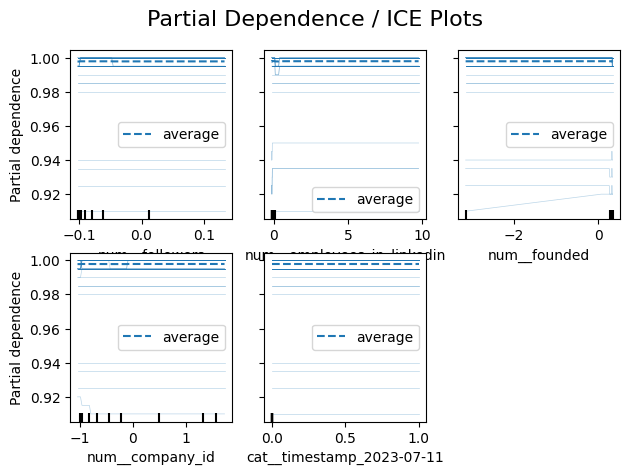

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

if 'models' in globals() and 'Random Forest' in models:
    rf = models['Random Forest']
    print("Random Forest model retrieved.")
else:
    print("Error: Random Forest model not found. Please ensure the model training cell has been run.")
    rf = None

feature_names = []
if 'preprocessor' in globals():
    try:
        if hasattr(preprocessor, 'get_feature_names_out'):
             feature_names = list(preprocessor.get_feature_names_out())
             print(f"Retrieved {len(feature_names)} feature names from preprocessor.")
        else:
             print("Warning: preprocessor does not have get_feature_names_out. Feature names might be incorrect for PDP.")
             if 'X_train' in globals():
                  feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
             else:
                  feature_names = [f"feature_{i}" for i in range(100)]


    except Exception as e:
        print(f"Error getting feature names from preprocessor: {e}")
        if 'X_train' in globals():
             feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
        else:
             feature_names = [f"feature_{i}" for i in range(100)]

else:
    print("Error: preprocessor object not found. Cannot get feature names for PDP.")
    if 'X_train' in globals():
         feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
    else:
         feature_names = [f"feature_{i}" for i in range(100)]

if 'X_test' in globals():
    if hasattr(X_test, 'toarray'):
        X_test_dense_pdp = X_test.toarray()
    elif isinstance(X_test, pd.DataFrame):
        X_test_dense_pdp = X_test.values
    else:
        X_test_dense_pdp = X_test

    print(f"X_test shape: {X_test_dense_pdp.shape}")

else:
    print("Error: X_test not found. Cannot generate PDPs.")
    X_test_dense_pdp = None


num_features_to_plot = min(5, len(feature_names))
top_features_to_plot = feature_names[:num_features_to_plot]
print(f"Plotting PDP/ICE for features: {top_features_to_plot}")


if rf is not None and X_test_dense_pdp is not None and top_features_to_plot:
    target_class_index = 0

    if hasattr(rf, 'classes_') and len(rf.classes_) > 2:
        print("Multi-class classification: using class 0 for PDP.")
        target_class_index = 0

    elif hasattr(rf, 'classes_') and len(rf.classes_) == 2:
         print("Binary classification: using class 1 for PDP.")
         target_class_index = 1


    try:
        display = PartialDependenceDisplay.from_estimator(
            rf,
            X_test_dense_pdp,
            features=top_features_to_plot,
            feature_names=feature_names,
            kind='both',
            target=target_class_index
        )
        display.figure_.suptitle("Partial Dependence / ICE Plots", fontsize=16)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\nCould not generate Partial Dependence Plots: {e}")
        print("Please check if the selected features exist in the data and the data format is correct.")

else:
    print("\nSkipping Partial Dependence Plots: Required variables (rf, X_test_dense_pdp, top_features_to_plot) are not available or invalid.")

# **Apply Lime**

In [ ]:
!pip install lime

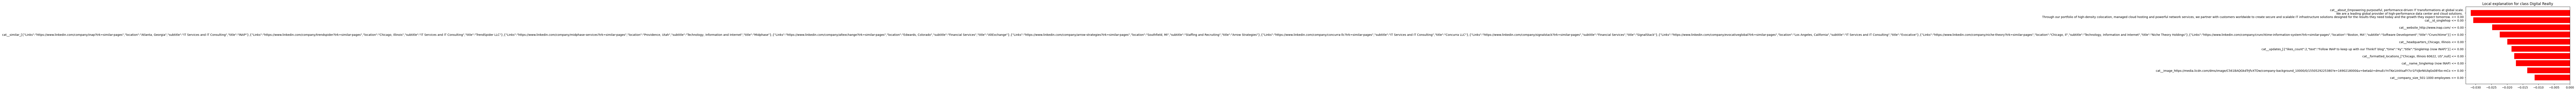

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lime
import lime.lime_tabular

model = models.get('Random Forest') if 'models' in globals() else None
if model is None:
    raise ValueError("Random Forest model not found.")

if 'preprocessor' in globals() and hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = list(preprocessor.get_feature_names_out())
elif isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]


if 'le' in globals() and hasattr(le, 'classes_'):
    class_names = list(le.classes_)
elif 'y_train' in globals():
    class_names = [f"Class {i}" for i in sorted(np.unique(y_train))]
else:
    class_names = ["Class 0", "Class 1"]


if hasattr(X_train, 'toarray'):
    X_train_dense = X_train.toarray()
else:
    X_train_dense = X_train

if hasattr(X_test, 'toarray'):
    X_test_dense  = X_test.toarray()
else:
    X_test_dense = X_test


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_dense,
    feature_names=feature_names,
    class_names=class_names,
    mode="classification"
)

i = 10  # Example instance
if i >= X_test_dense.shape[0]:
    raise IndexError(f"Instance index {i} out of bounds.")

instance = X_test_dense[i].flatten() if hasattr(X_test_dense[i], 'ndim') else X_test_dense[i]

exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=10
)

exp.as_pyplot_figure()
plt.show()

# **Image for LIME**

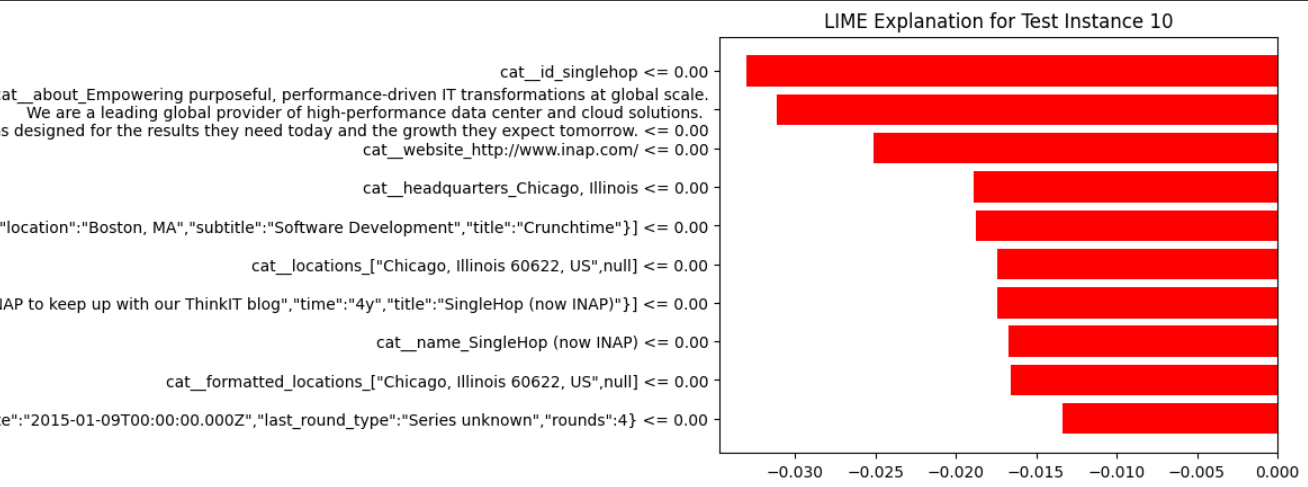

Retrieved 10 class names from LabelEncoder.

Explaining instance 5 from the test set...
LIME Explanation:
  cat__about_Empowering purposeful, performance-driven IT transformations at global scale.
We are a leading global provider of high-performance data center and cloud solutions. 
Through our portfolio of high-density colocation, managed cloud hosting and powerful network services, we partner with customers worldwide to create secure and scalable IT infrastructure solutions designed for the results they need today and the growth they expect tomorrow. <= 0.00: -0.0337
  cat__id_singlehop <= 0.00: -0.0330
  cat__website_http://www.inap.com/ <= 0.00: -0.0227
  cat__similar_[{"Links":"https://www.linkedin.com/company/inap?trk=similar-pages","location":"Atlanta, Georgia","subtitle":"IT Services and IT Consulting","title":"INAP"},{"Links":"https://www.linkedin.com/company/trendspider?trk=similar-pages","location":"Chicago, Illinois","subtitle":"IT Services and IT Consulting","title":"Trend

/tmp/ipython-input-922214185.py:66: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


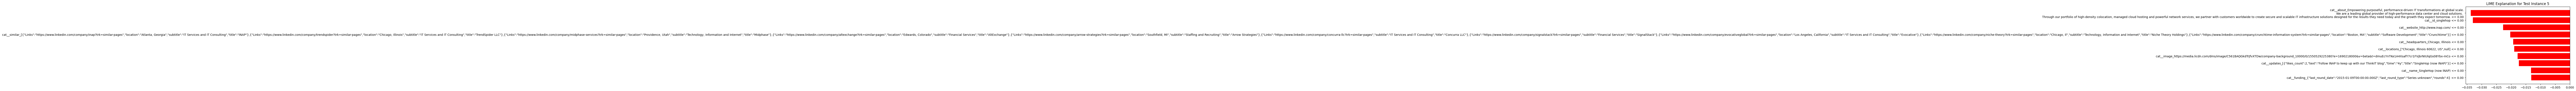


LIME Explanation (Interactive):


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lime
import lime.lime_tabular

model = models.get('Random Forest') if 'models' in globals() else None
if model is None:
    raise ValueError("Random Forest model not found.")

if 'preprocessor' in globals() and hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = list(preprocessor.get_feature_names_out())
elif isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

if 'le' in globals() and hasattr(le, 'classes_'):
    class_names = list(le.classes_)
    print(f"Retrieved {len(class_names)} class names from LabelEncoder.")
elif 'y_train' in globals():
    class_names = [f"Class {i}" for i in sorted(np.unique(y_train))]
    print("Warning: LabelEncoder not found. Using generic class names.")
else:
    class_names = ["Class 0", "Class 1"]
    print("Warning: y_train not found. Using default binary class names.")

if hasattr(X_train, 'toarray'):
    X_train_dense = X_train.toarray()
else:
    X_train_dense = X_train

if hasattr(X_test, 'toarray'):
    X_test_dense  = X_test.toarray()
else:
    X_test_dense = X_test

if model is not None and len(feature_names) > 0 and len(class_names) > 0 and X_train_dense is not None and X_test_dense is not None:
    try:
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=X_train_dense,
            feature_names=feature_names,
            class_names=class_names,
            mode="classification"
        )
        i = 5
        if i < X_test_dense.shape[0]:
            print(f"\nExplaining instance {i} from the test set...")
            instance_to_explain = X_test_dense[i]
            if isinstance(instance_to_explain, np.ndarray) and instance_to_explain.ndim > 1:
                instance_to_explain = instance_to_explain.flatten()

            exp = explainer.explain_instance(
                data_row=instance_to_explain,
                predict_fn=model.predict_proba,
                num_features=10
            )

            print("LIME Explanation:")
            for feature, weight in exp.as_list():
                 print(f"  {feature}: {weight:.4f}")

            print("\nLIME Explanation Plot:")
            exp_figure = exp.as_pyplot_figure()
            plt.title(f"LIME Explanation for Test Instance {i}")
            plt.tight_layout()
            plt.show()
            print("\nLIME Explanation (Interactive):")
            exp.show_in_notebook(show_all=False)

        else:
            print(f"Error: Instance index {i} is out of bounds for the test set (shape: {X_test_dense.shape}). Cannot explain instance.")


    except Exception as e:
        print(f"An error occurred during LIME explanation: {e}")
        print("LIME explanation could not be generated.")

else:
    print("\nSkipping LIME analysis: Required variables (model, feature_names, class_names, X_train_dense, X_test_dense) are not available or invalid.")

# **Image for Lime**

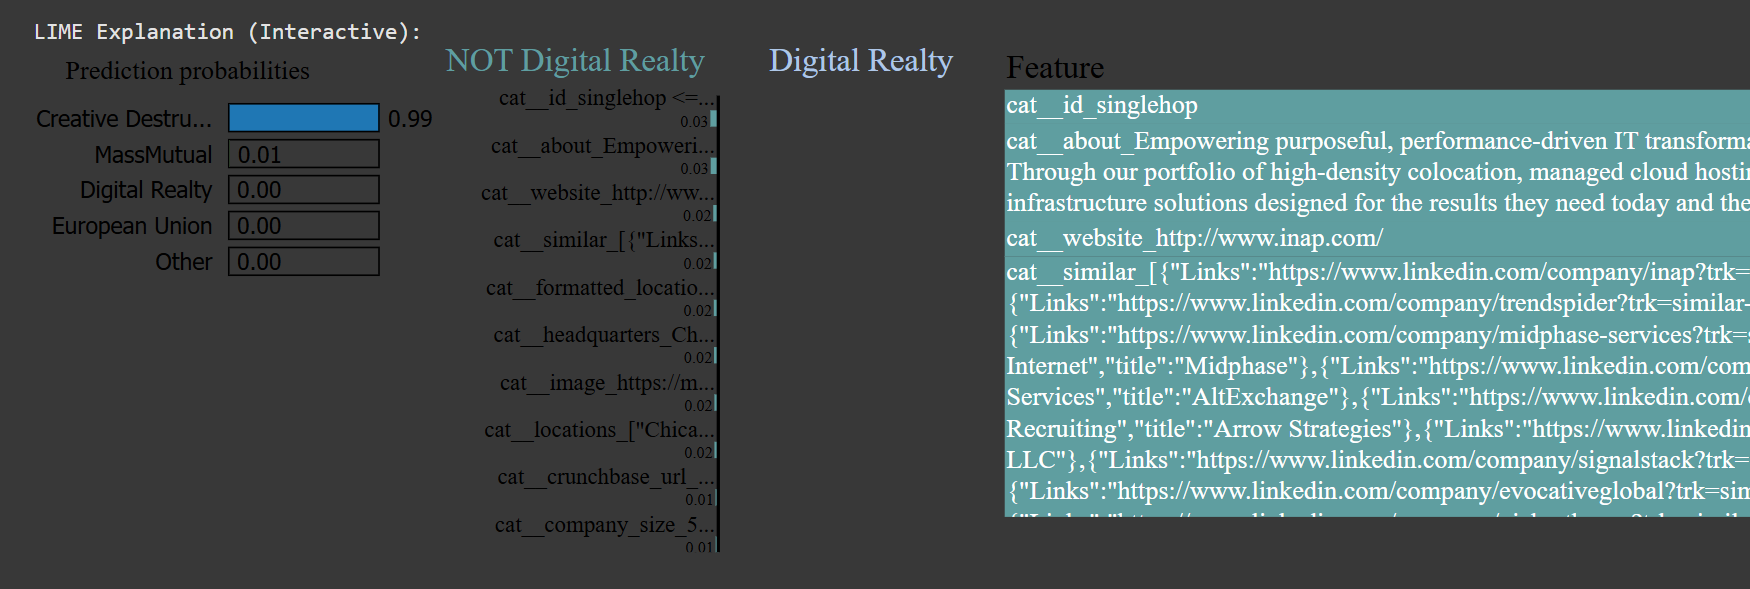

# **Confusion Matrix**

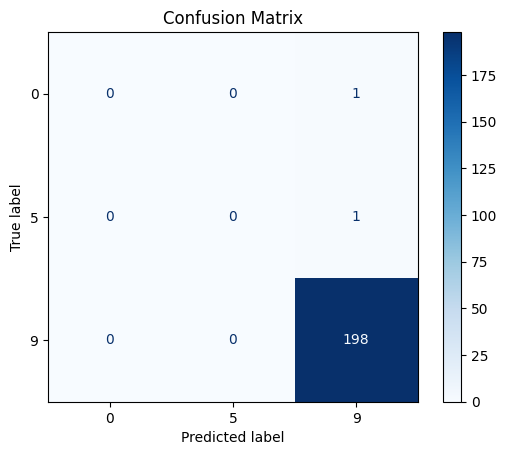

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, y_pred)

display_labels = [str(label) for label in sorted(np.unique(y_test))]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# **Heatmap For Numerical Columns**

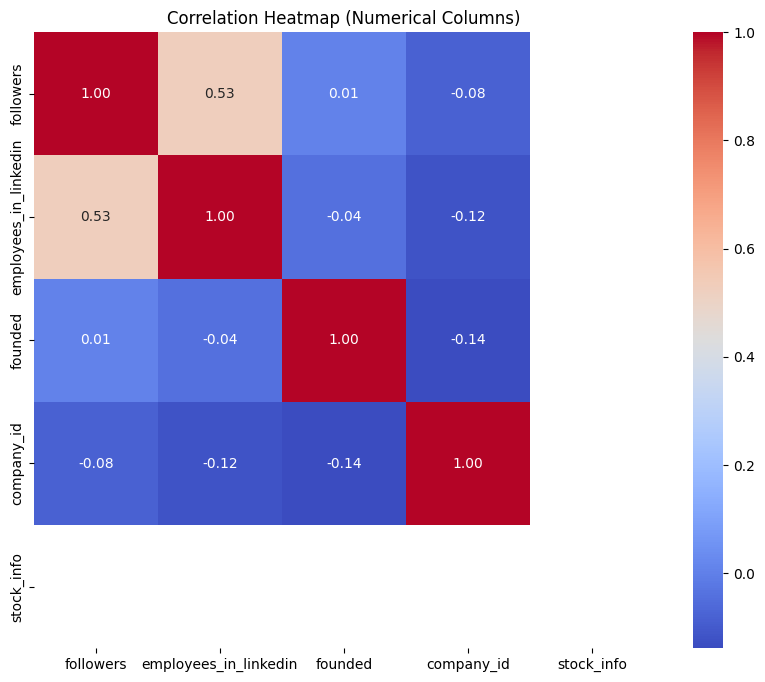

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    try:
        corr = df[numerical_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap (Numerical Columns)')
        plt.show()
    except Exception as e:
        print(f"\nCould not generate Correlation Heatmap: {e}")
elif len(numerical_cols) == 1:
     print("\nSkipping Correlation Heatmap: Only one numerical column found.")
else:
    print("\nSkipping Correlation Heatmap: No numerical columns found.")